In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

# Liver Prediction

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Get the Data

In [16]:
liver_data = pd.read_csv('../datasets/liver/train.csv', encoding="ISO-8859-1'")

### Take Quick Look of dataset

In [25]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
liver_data = fetch_ucirepo(id=225) 
  
# data (as pandas dataframes) 
X = liver_data.data.features 
y = liver_data.data.targets 

In [26]:
X.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [27]:
X['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [30]:
X.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
dtype: int64

In [31]:
X.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [40]:
liver_data_enhanced = X.copy()
liver_data_enhanced['Gender'] = liver_data_enhanced['Gender'].map({'Female': 0, 'Male': 1})
liver_data_enhanced.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [36]:
liver_data_enhanced['A/G Ratio'].fillna(liver_data_enhanced['A/G Ratio'].mean(), inplace=True)

In [37]:
liver_data_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    int64  
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


### Visualize the dataset

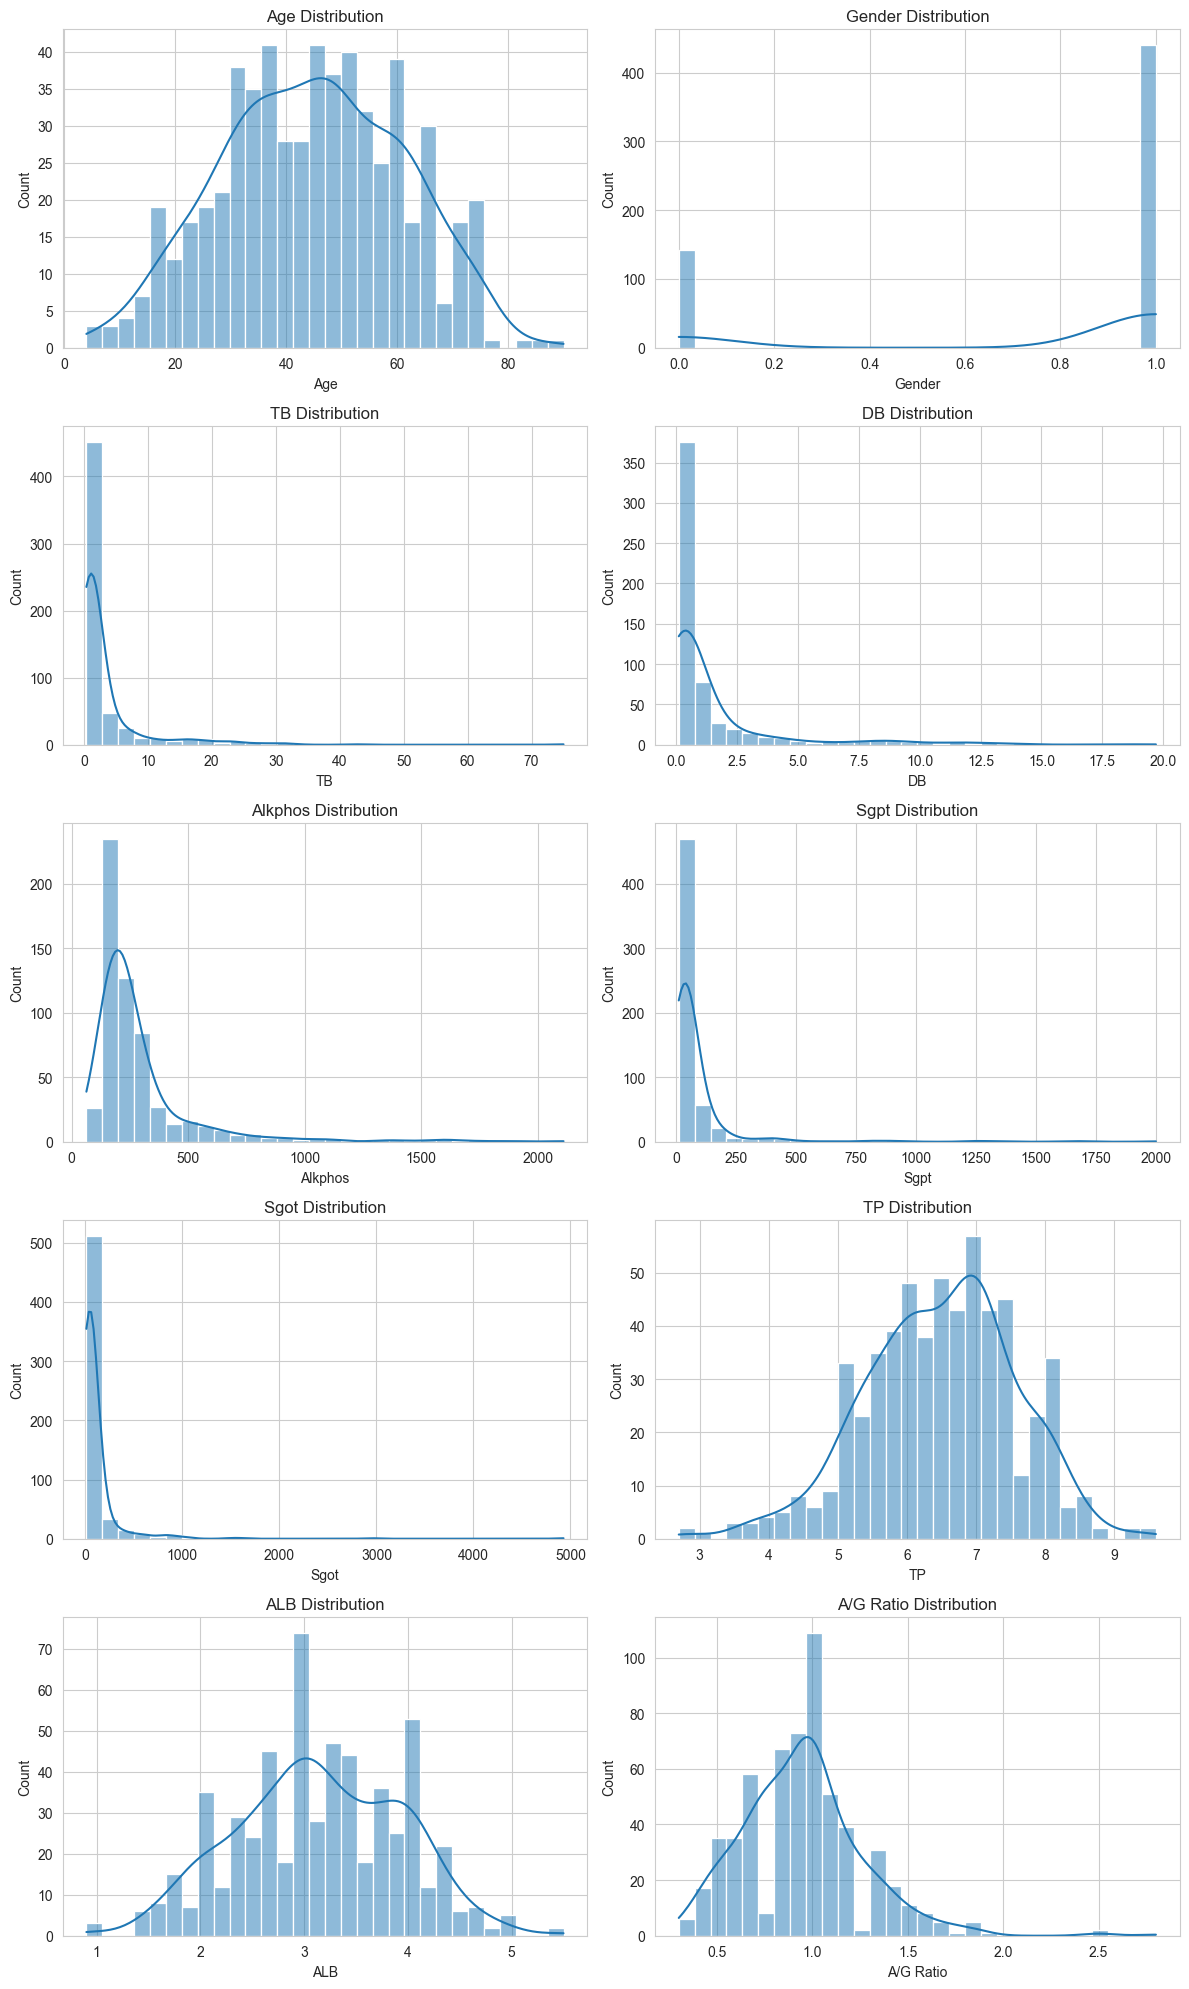

In [38]:
from src.visualization.plots import plot_multiple_features
plot_multiple_features(liver_data_enhanced)

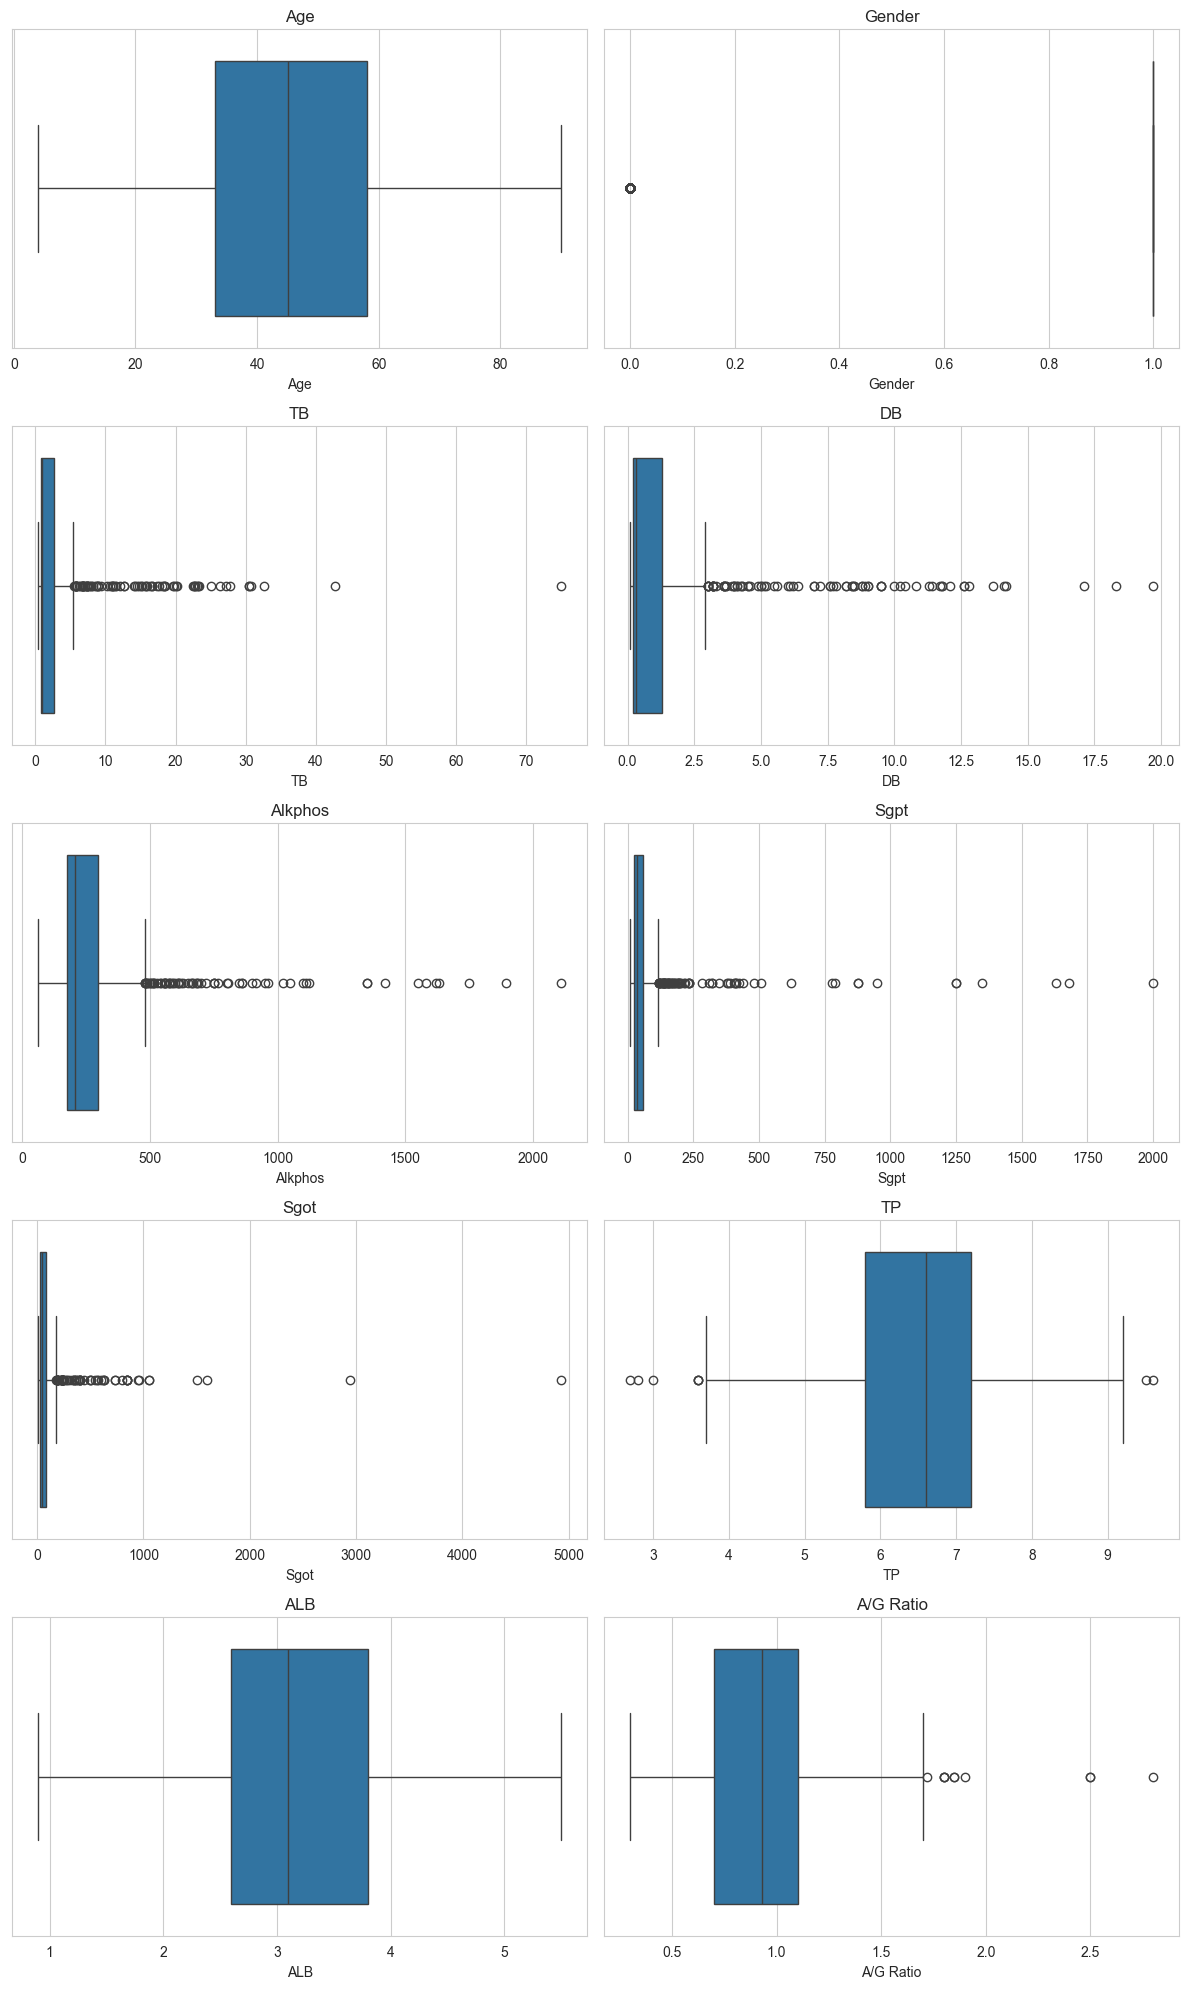

In [41]:
from src.visualization.plots import plot_multiple_boxplot
plot_multiple_boxplot(liver_data_enhanced)

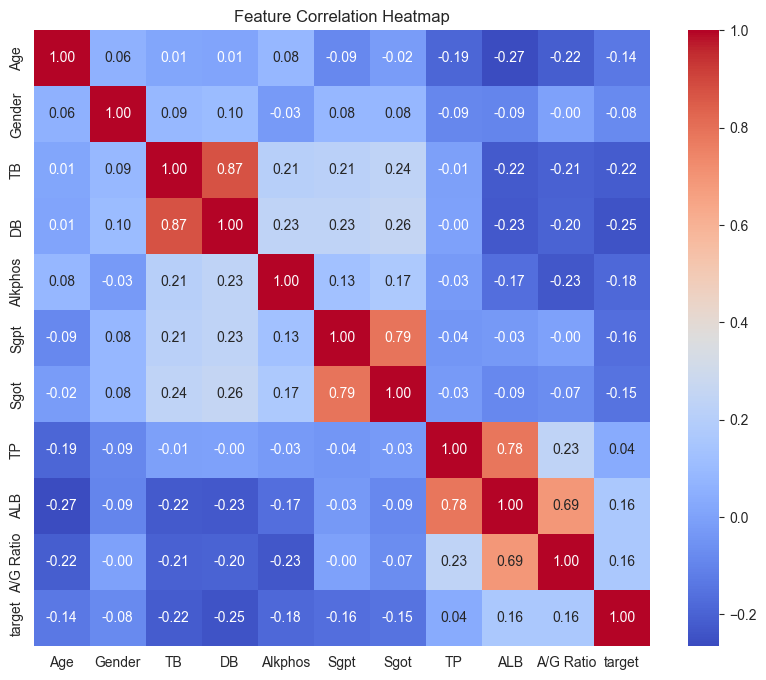

In [45]:
liver_data_enhanced['target'] = y
from src.visualization.plots import plot_correlation_heatmap
plot_correlation_heatmap(liver_data_enhanced)

In [46]:
from src.utils.main import corelation_data
corelation_data(liver_data_enhanced, 'target')

target       1.000000
A/G Ratio    0.163131
ALB          0.161388
TP           0.035008
Gender      -0.082416
Age         -0.137351
Sgot        -0.151934
Sgpt        -0.163416
Alkphos     -0.184866
TB          -0.220208
DB          -0.246046
Name: target, dtype: float64

In [47]:
liver_data_enhanced.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio', 'target'],
      dtype='object')

In [49]:
y.value_counts()

Selector
1           416
2           167
Name: count, dtype: int64

In [68]:
X = liver_data_enhanced.drop('target', axis=1)
y = liver_data_enhanced['target']
X['A/G Ratio'].fillna(X['A/G Ratio'].mean(), inplace=True)


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


lg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])


lg_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [103]:
y_pred = lg_pipeline.predict(X_test)
y_train_pred = lg_pipeline.predict(X_train)

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Precision:         {precision:.4f}")
print(f"Recall:            {recall:.4f}")
print(f"F1-Score:          {f1:.4f}")


Training Accuracy: 0.7232 (72.32%)
Testing Accuracy:  0.6923 (69.23%)
Precision:         0.7282
Recall:            0.9036
F1-Score:          0.8065


In [105]:
if train_accuracy - test_accuracy > 0.1:
    print("\n⚠️  Warning: Model might be overfitting (train accuracy >> test accuracy)")
else:
    print("\n✓ Model generalization looks good!")


✓ Model generalization looks good!


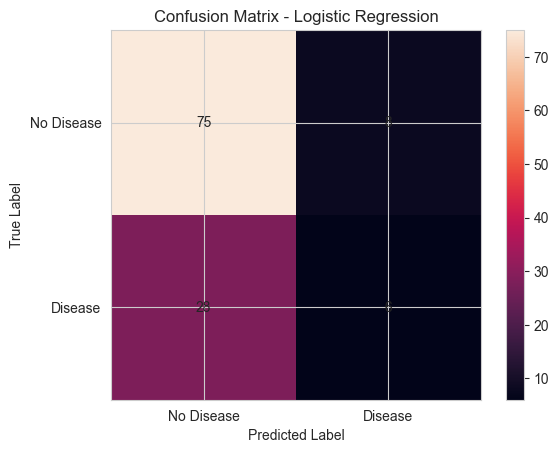

In [106]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()

classes = ['No Disease', 'Disease']
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Make the real world predications

In [108]:
patients = pd.DataFrame({
    'Age': [65],
    'Gender': ['Female'],
    'TB': [0.7],
    'DB': [0.1],
    'Alkphos': [187],
    'Sgpt': [16],
    'Sgot': [18],
    'TP': [6.8],
    'ALB': [3.3],
    'A/G Ratio': [0.90]
})


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9


In [111]:
# Create 5 sample patients (Gender: Female=0, Male=1)
new_patients = pd.DataFrame([
    {'Age':50, 'Gender':0, 'TB':1.2, 'DB':0.3, 'Alkphos':230, 'Sgpt':40, 'Sgot':50, 'TP':6.5, 'ALB':3.1, 'A/G Ratio':0.9},
    {'Age':40, 'Gender':1, 'TB':0.6, 'DB':0.1, 'Alkphos':180, 'Sgpt':22, 'Sgot':20, 'TP':7.2, 'ALB':3.8, 'A/G Ratio':1.1},
    {'Age':11, 'Gender':0, 'TB':2.5, 'DB':1.2, 'Alkphos':300, 'Sgpt':12, 'Sgot':12, 'TP':5.5, 'ALB':2.8, 'A/G Ratio':0.8},
    {'Age':35, 'Gender':1, 'TB':0.3, 'DB':0.05, 'Alkphos':150, 'Sgpt':18, 'Sgot':16, 'TP':7.8, 'ALB':4.0, 'A/G Ratio':1.2},
    {'Age':12, 'Gender':1, 'TB':1.8, 'DB':0.7, 'Alkphos':210, 'Sgpt':55, 'Sgot':60, 'TP':6.0, 'ALB':3.0, 'A/G Ratio':0.95},
])

# If Gender is still strings, map them
if new_patients['Gender'].dtype == object:
    new_patients['Gender'] = new_patients['Gender'].map({'Female': 0, 'Male': 1})

new_patients['Gender'] = new_patients['Gender'].astype(int)

# Predict classes and probabilities using the trained logistic pipeline
preds = lg_pipeline.predict(new_patients)
probs = lg_pipeline.predict_proba(new_patients)

results = new_patients.copy()
results['predicted_class'] = preds
results['prob_class_0'] = probs[:, 0]
results['prob_class_1'] = probs[:, 1]

results

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,predicted_class,prob_class_0,prob_class_1
0,50,0,1.2,0.30,230,40,50,6.5,3.1,0.90,1,0.676957,0.323043
1,40,1,0.6,0.10,180,22,20,7.2,3.8,1.10,1,0.519251,0.480749
2,11,0,2.5,1.20,300,12,12,5.5,2.8,0.80,2,0.474069,0.525931
3,35,1,0.3,0.05,150,18,16,7.8,4.0,1.20,1,0.542830,0.457170
4,12,1,1.8,0.70,210,55,60,6.0,3.0,0.95,1,0.601777,0.398223
